## Suicides vs The Freedom Index and The Internet

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Suicide Dataset

In [4]:
suicide_df = pd.read_csv('suicide-rates-1985-2016.csv')
suicide_df.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X


In [5]:
suicides2015_df = suicide_df.loc[suicide_df['year'] == 2015]
suicides2015_df.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
576,Antigua and Barbuda,2015,female,55-74 years,1,6403,15.62,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Boomers
577,Antigua and Barbuda,2015,female,15-24 years,0,8561,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials
578,Antigua and Barbuda,2015,female,25-34 years,0,7740,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials


In [6]:
suicides2015_grp = suicides2015_df.groupby(['country']).agg({'suicides/100k pop': 'mean'})
suicides2015_grp.head(3)

,suicides/100k pop
country,
Antigua and Barbuda,1.301667
Argentina,9.344167
Armenia,3.773333


### Freedom of the World Dataset

In [10]:
fow_df = pd.read_csv('Freedom of the World Index 2015.csv')
fow_df = fow_df.rename(index=str, columns={'Country': 'country', 'Status': 'status'})
fow_df.set_index('country', inplace=True)
fow_df.head(3)

,PR,CL,status
country,,,
Afghanistan,6,6,NF
Albania,3,3,PF
Algeria,6,5,NF


#### Freedom and Suicide data join

In [13]:
df3 = pd.merge(suicides2015_grp, fow_df, left_index=True, right_index=True)

df3.reset_index(inplace=True)
df3 = df3.rename(index=str, columns={'index': 'country'})
df3[['suicides/100k pop', 'PR', 'CL']] = df3[['suicides/100k pop', 'PR', 'CL']].apply(pd.to_numeric)
df3.head(3)

,country,suicides/100k pop,PR,CL,status
0,Antigua and Barbuda,1.301667,2,2,F
1,Argentina,9.344167,2,2,F
2,Armenia,3.773333,5,4,PF


## Graph 1: Suicides vs Freedom

In [16]:
f_df = df3.loc[df3['status'] == 'F', :]
pf_df = df3.loc[df3['status'] == 'PF', :]
nf_df = df3.loc[df3['status'] == 'NF', :]

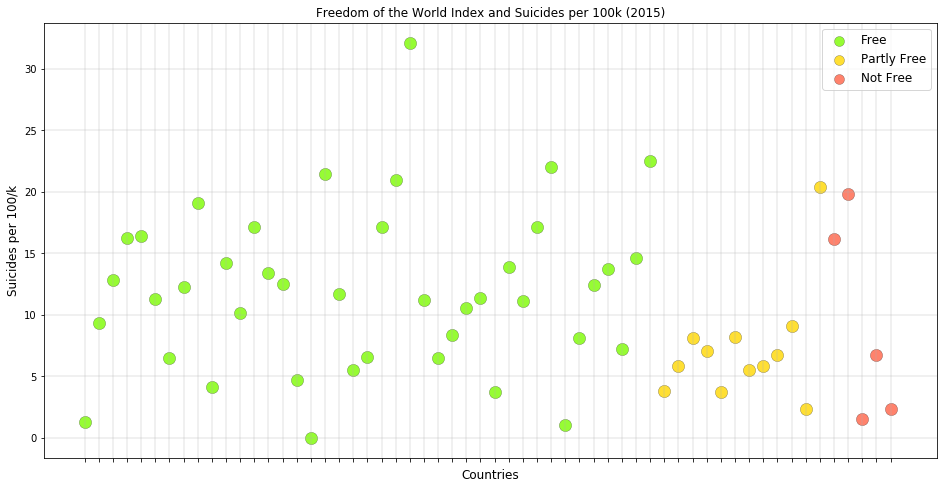

In [26]:
# Free countries plot
f_x = f_df['country']
f_y = f_df['suicides/100k pop']
# Partly Free countries plot
pf_x = pf_df['country']
pf_y = pf_df['suicides/100k pop']
# Not Free countries plot
nf_x = nf_df['country']
nf_y = nf_df['suicides/100k pop']

plt.figure(figsize=(16,8))
plt.scatter(f_x, f_y, s=150, c="lawngreen", alpha=0.8, edgecolors="black", linewidths=0.25, label="Free").axes.xaxis.set_ticklabels([])
plt.scatter(pf_x, pf_y,s=150, c="gold", alpha=0.8, edgecolors="black", linewidths=0.25, label="Partly Free").axes.xaxis.set_ticklabels([])
plt.scatter(nf_x, nf_y, s=150, c="tomato", alpha=0.8, edgecolors="black", linewidths=0.25, label="Not Free").axes.xaxis.set_ticklabels([])

plt.title("Freedom of the World Index and Suicides per 100k (2015)", fontsize='large')
plt.xlabel("Countries", fontsize='large')
plt.ylabel("Suicides per 100/k", fontsize='large')
plt.grid(alpha=.9, lw=.4)

lgnd = plt.legend(markerscale=.5, scatterpoints=1, numpoints=1, mode='expanded', fontsize='large')
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]

plt.savefig("Freedom of the World Index and Suicides per 100k (2015) Scatterplot.png")
plt.show()

### World Development Indicators Dataset

In [28]:
indicators_df = pd.read_csv('Indicators.csv')
indicators_sm_df = indicators_df.loc[indicators_df['Year'] == 2015]
indicators_sm_df.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5641696,Arab World,ARB,"Bird species, threatened",EN.BIR.THRD.NO,2015,297.000000
5641697,Arab World,ARB,Business extent of disclosure index (0=less di...,IC.BUS.DISC.XQ,2015,5.666667
5641698,Arab World,ARB,Cost of business start-up procedures (% of GNI...,IC.REG.COST.PC.ZS,2015,31.142857


####  Broadband Internet Subscriptions (per 100 people)

In [30]:
indicators_2014 = indicators_df.loc[indicators_df['Year'] == 2014]
indicators_sm_df3 = indicators_2014.loc[indicators_2014['IndicatorName'] == 'Fixed broadband subscriptions (per 100 people)']
indicators_sm_df3 = indicators_sm_df3.rename(index=str, columns={'CountryName': 'country'})
indicators_sm_df3.set_index('country', inplace=True)

indicators_sm_df3.head(3)

,CountryCode,IndicatorName,IndicatorCode,Year,Value
country,,,,,
Arab World,ARB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,2014,4.374855
Caribbean small states,CSS,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,2014,10.023820
Central Europe and the Baltics,CEB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,2014,23.448559


In [32]:
join_internet = pd.merge(indicators_sm_df3, suicides2015_grp, left_index=True, right_index=True)
join_internet.head(3)

,CountryCode,IndicatorName,IndicatorCode,Year,Value,suicides/100k pop
country,,,,,,
Antigua and Barbuda,ATG,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,2014,15.071010,1.301667
Argentina,ARG,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,2014,14.690050,9.344167
Armenia,ARM,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,2014,9.133476,3.773333


## Graph 2: Suicides vs Internet

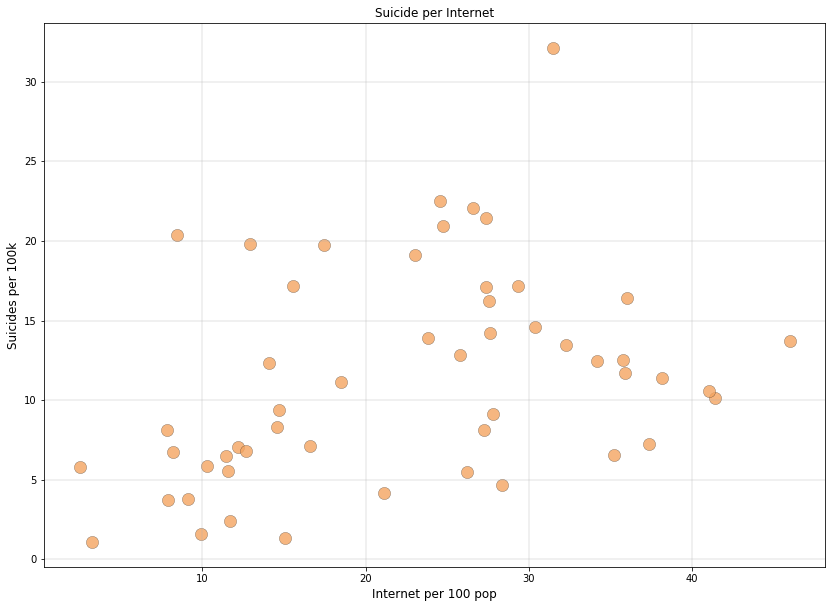

In [40]:
x = join_internet["Value"]
y = join_internet["suicides/100k pop"]

plt.figure(figsize=(14,10))
plt.scatter(x, y, s=150, c='sandybrown', alpha=0.8, edgecolors='black', linewidths=0.25)

plt.title('Suicide per Internet', fontsize='large')
plt.xlabel('Internet per 100 pop', fontsize='large')
plt.ylabel('Suicides per 100k', fontsize='large')
plt.grid(alpha=.9, lw=.4)

plt.savefig("Broadband Internet and Suicides per 100k (2014).png")
plt.show()

#### Graph 2 with Seaborn and Regression

AttributeError: module 'seaborn' has no attribute 'plt'

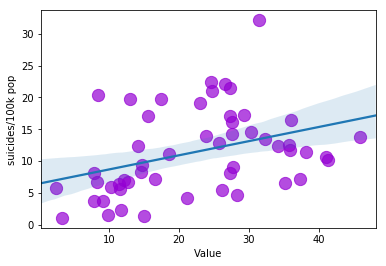

In [45]:
import seaborn as sns

x = join_internet["Value"]
y = join_internet["suicides/100k pop"]

sns_plot = sns.regplot(x,y, scatter_kws={"color":"darkviolet","alpha":0.7,"s":150})
fig = sns_plot.get_figure()
fig.savefig("output.png")
sns.plt.show()